[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


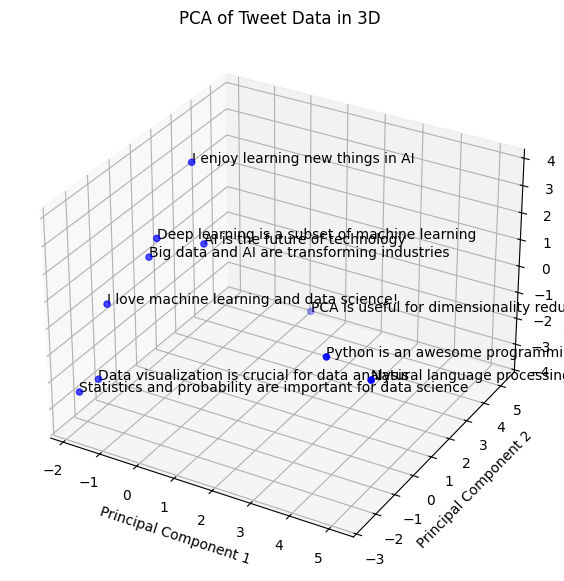

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from mpl_toolkits.mplot3d import Axes3D

nltk.download('stopwords')

# Crear base de datos de muestra
data = {
    'tweet': [
        'I love machine learning and data science!',
        'Python is an awesome programming language',
        'Data visualization is crucial for data analysis',
        'Natural language processing with Python is great',
        'PCA is useful for dimensionality reduction',
        'I enjoy learning new things in AI',
        'Big data and AI are transforming industries',
        'Statistics and probability are important for data science',
        'Deep learning is a subset of machine learning',
        'AI is the future of technology'
    ]
}

df = pd.DataFrame(data)

# Preprocesamiento de los datos
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

# Convertir los textos a vectores TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_tweet']).toarray()

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con tres componentes
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df_pca['tweet'] = df['tweet']

# Visualización en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c='b', marker='o')

for i in range(df_pca.shape[0]):
    ax.text(df_pca.PC1[i], df_pca.PC2[i], df_pca.PC3[i], df_pca.tweet[i], 
            size=10, zorder=1, color='k')

ax.set_title('PCA of Tweet Data in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
